# PROYEK: Memperbaiki Nilai G3

![Data Science Workflow](ds-workflow.png)

## Goal Proyek
- Eksplorasi Dataset
- Ikuti Proses Data Science
- Mengidentifikasi Solusi

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

In [18]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

In [5]:
data = pd.read_csv('student-mat.csv')

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
len(data)

395

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

In [5]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

In [7]:
data.corr()['G3']

age          -0.161579
Medu          0.217147
Fedu          0.152457
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

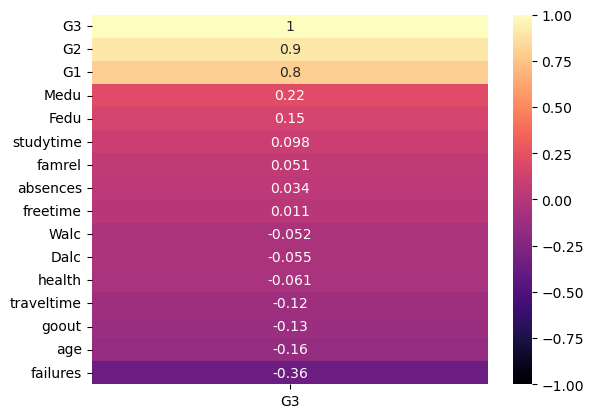

In [42]:
# dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# mp.show()

heatmap = sb.heatmap(data.corr()[['G3']].sort_values(by='G3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='magma')

In [8]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### PILIH 3 features
- Putuskan 3 feature yang akan digunakan dalam laporan

# traveltime, goout, failures
- traveltime ( lama waktu siswa pergi ke sekolah )
- goout ( pergi bersama teman )
- failures ( jumlah gagal dalam kelas sebelumnya )

## Step 4: Report
-

# Berdasarkan hasil korelasi ditemukan bahwa :
- Semakin lama siswa ke sekolah, maka semakin kecil nilai g3 nya
- Semakin sering siswa keluar bersama temannya, maka semakin kecil nilai g3 nya
- Semakin sering siswa mengulang kelas, maka semakin kecil nilai g3 nya

## Step 5: Actions
- Gunakan insights
- Bagaimana mengukur impact

### Deskripsi
- Apa saja tindakan yang harus dilakukan oleh sekolah?
- Bagaimana sekolah mengukur impactnya?

# Actions

- Memberikan fasilitas kendaraan bagi siswa yang jauh dari sekolah
- Memberikan himbauan kepada siswa agar tidak terlalu sering keluar bersama teman
- Meningkatkan kualitas pembelajaran agar tidak ada siswa yang mengulang kelas